## 4.2.1: Introduction to GPS Tracking of Birds
In this case study, we will introduce you
to manipulating, examining, and visualizing GPS data used
to tracking birds in this way.
The data for this case study comes from the LifeWatch INBO project.
Several data sets have been released as part of this project.
We will use a small data set that consists of migration data for three
gulls named Eric, Nico, and Sanne.
The csv file contains eight columns, and includes variables
like latitude, longitude, altitude, and time stamps.
In this case study, we will first load the data,
visualize some simple flight trajectories,
track flight speed, learn about daytime and much, much more.
We have made the file bird_tracking.csv available to you on the course site

In [2]:
import pandas as pd

In [3]:
birddata=pd.read_csv("bird_tracking.csv")

In [4]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
ix= birddata.bird_name=="Eric"
ix

0         True
1         True
2         True
3         True
4         True
         ...  
61915    False
61916    False
61917    False
61918    False
61919    False
Name: bird_name, Length: 61920, dtype: bool

In [8]:
x,y=birddata.longitude[ix],birddata.latitude[ix]

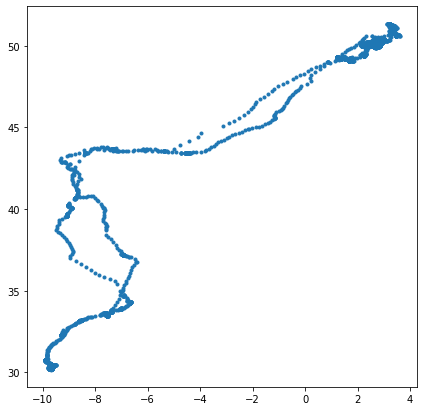

In [10]:
plt.figure(figsize=(7,7))
plt.plot(x,y,".")
plt.savefig('Eric.pdf')

Again, the flight trajectory will be substantially distorted
because we did not implement any type of cartographic projection.
Nevertheless, we get a decent sense of the flight path.

In [15]:
#getting the unique bird names
bird_names=pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

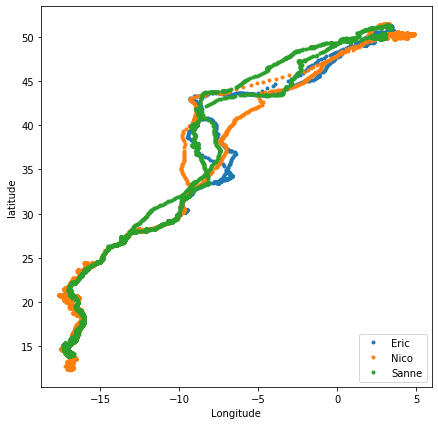

In [16]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix= birddata.bird_name==bird_name
    x,y=birddata.longitude[ix],birddata.latitude[ix]
    plt.plot(x,y,".",label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

### Examining Flight Speed

In [20]:
ix=birddata.bird_name=="Eric"

In [21]:
speed=birddata.speed_2d[ix]

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

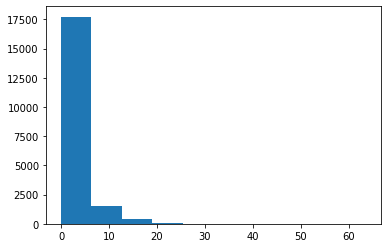

In [22]:
plt.hist(speed)

In [24]:
#checking there is a data that is not a number in speed
np.isnan(speed).any()

True

In [25]:
#Checking the numbe of numbers in the speed column
np.sum(np.isnan(speed))

85

to check the number of the non numbers, we can use a NOT to turn true to false and perform previous operation

In [26]:
ind=np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [27]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

we'll only include those entries for which ind is not equal to true.

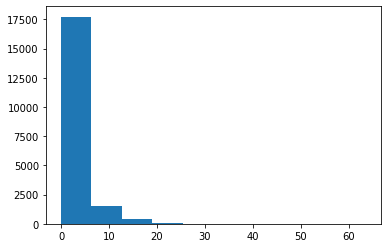

In [28]:
ix=birddata.bird_name=="Eric"
speed=birddata.speed_2d[ix]
ind=np.isnan(speed)
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

I'm going to add an x label, a y label, I
will specify the locations of the bins, and I would also
like my histogram to be normalized.

Finally, I have normalized the y-axis, meaning
that an integral over the histogram would be equal to 1.
this can be done by setting `density=1`.

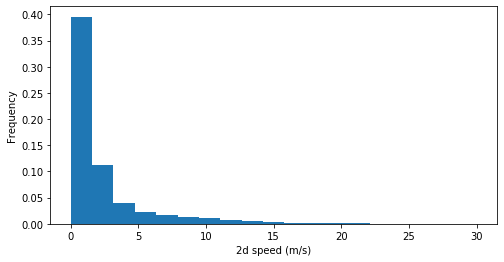

In [31]:
ix=birddata.bird_name=="Eric"
plt.figure(figsize=(8,4))
speed=birddata.speed_2d[ix]
ind=np.isnan(speed)
plt.hist(speed[~ind],bins=np.linspace(0,30,20),density=True)
plt.xlabel("2d speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("hist.pdf")

Pandas provide some planning functions as well,
although less customizable than PLT plots,
they readily deal with things like NaNs.
However you want to make sure that you always
examine your data carefully and look for the presence of NaNs
before preparing your plots.

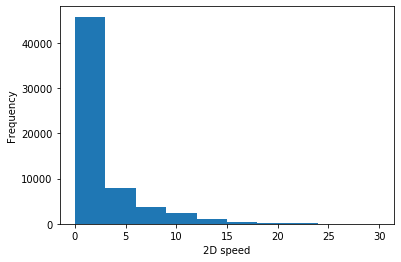

In [32]:
birddata.speed_2d.plot(kind='hist',range=[0,30])
plt.xlabel("2D speed")
plt.savefig("pd_hist.pdf")

### Using Datetime